CIFAR10 è un dataset RGB, a livello di codice loop cambia poco, cambia come viene processato il dataset. Quello che cambia rispetto a MNIST è la rete e come viene processato il dataset

È più difficile ottenere performance alte su CIFAR10

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
batch_size = 64
lr = 0.01 # 0.01
epoch = 2 # 2

In [ ]:
import torch
import numpy
import torchvision.datasets as datasets
from torchvision import transforms

cifar_trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

imgs = [item[0] for item in cifar_trainset] # item[0] and item[1] are image and its label
imgs = torch.stack(imgs, dim=0).numpy()

# calculate mean over each channel (r,g,b)
mean_r = imgs[:,0,:,:].mean()
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()
print("media", mean_r,mean_g,mean_b)

# calculate std over each channel (r,g,b)
std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()
print("std", std_r,std_g,std_b)

100%|██████████| 170498071/170498071 [00:02<00:00, 81374306.42it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
media 0.49139968 0.48215827 0.44653124
std 0.24703233 0.24348505 0.26158768


In [ ]:
'''
import numpy as np
data = []
for i in trainloader:
  data.append(i[0].numpy())
a = np.concatenate(data)
print(np.mean(a, axis=(0,2,3)))
print(np.std(a, axis=(0, 2 ,3)))

# OPPURE


data = trainset.data / 255

mean = data.mean(axis=(0,1,2))
std = data.std(axis=(0,1,1))
print(f"Mean: {mean} STD {std}")
'''

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))]) # dimensioni 3 x 32 x 32, quando si va a lavorare con un dataset RGB il Normalize ha 3 canali, si normalizza per tutti e tre i canali, con media 0 e deviazione standard 1

# non è corretta la normalizzazione perché dobbiamo calcolarci la effettiva media e std nel dataset
# PASSO 0, calcolarsi questi valori effettivi di media e std

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


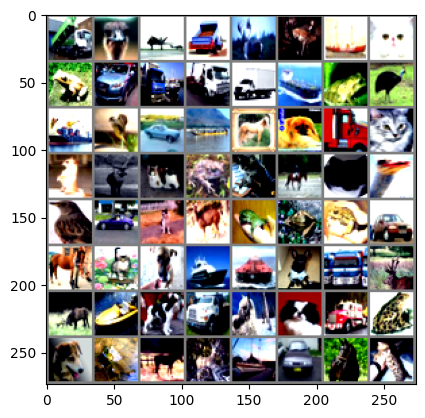

truck bird  plane truck deer  deer  ship  cat   frog  car   truck truck truck ship  frog  bird  ship  bird  car   ship  horse dog   truck cat   dog   deer  cat   frog  cat   horse cat   bird  bird  car   cat   deer  frog  frog  frog  car   horse cat   dog   ship  ship  dog   truck deer  deer  ship  dog   truck horse dog   truck frog  dog   frog  horse deer  ship  car   horse cat  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
# rete abbastanza standard, cnn classica

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # DIFFERENZA MNIST: definito layer di pool e viene chiamato sempre il solito più volte, lo posso chiamare più volte perché non ha paramentri da dichiarare, LE CONV DEVONO ESSERE DISTINTE
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # DIFFERENZA MNIST: uscita ultimo fc, queste uscite si chiamano logit, uscita della rete, prima di una softmax
        return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # la diamo alla gpu
net.to(device)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
import torch.optim as optim

# DIFFERENZA
# come viene calcolata la loss: prende in input i logit (uscita della rete) e dà in output la cross-entropy - due passaggi in uno
# MNIST: (nel train e nella definizione della rete)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9) # originale 0.001

NameError: ignored

In [ ]:
  # loop delle epoche

  for epoch in range(epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): # i è id del batch, conta le iterazioni. data sono gli input (immagini) e le label
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


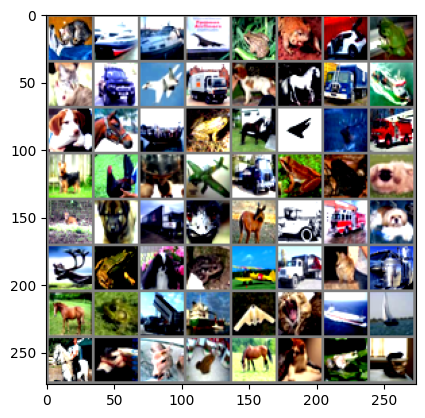

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))
# classe predette per un output

Predicted:  frog  ship  truck frog 


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
# accuratezza per tutto il dataset
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 56.7 %
Accuracy for class: car   is 51.3 %
Accuracy for class: bird  is 29.6 %
Accuracy for class: cat   is 50.2 %
Accuracy for class: deer  is 59.1 %
Accuracy for class: dog   is 22.0 %
Accuracy for class: frog  is 70.0 %
Accuracy for class: horse is 52.8 %
Accuracy for class: ship  is 78.5 %
Accuracy for class: truck is 69.4 %


In [ ]:
# GRAFICI

## Exercise 1

Try to use a scheduler for the learning rate (https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate).

What are the differences?
Does it improves the training convergence/test accuracy?

mettere uno scheduler, lo scheduler fa in modo che il lr venga aggiustato, diminuito durante il loop di training. il motivo è che nel momento in cui siamo fermi in un plateux di addestramento, c'è bisogno di diminuire il lr sennò si "rimbalza" e non si raggiunge mai il minimo


# TRAINING NO SCHEDULER

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # DIFFERENZA MNIST: definito layer di pool e viene chiamato sempre il solito più volte, lo posso chiamare più volte perché non ha paramentri da dichiarare, LE CONV DEVONO ESSERE DISTINTE
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # DIFFERENZA MNIST: uscita ultimo fc, queste uscite si chiamano logit, uscita della rete, prima di una softmax
        return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # la diamo alla gpu
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR
# from torch.optim.lr_scheduler import StepLR

train_losses = []
test_losses = []
test_accuracies = []



batch_size = 64
lr = 0.01 #0.01   0.1 0.001 0.0001
epochs = 30 #30

In [ ]:
criterion = nn.CrossEntropyLoss(weight=None) # la loss prende in input i logit e restituisce in output la softmax cross-entropy
optimizer = optim.SGD(net.parameters(), lr = lr, momentum=0.9)

def train(model, device, trainloader, optimizer, epoch):
    model.train() # riguarda pytorch
    losses = []
    for epoch in range(1, epochs + 1):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize, fulcro della rete
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
              running_loss = 0.0

          losses.append(loss.item())
      return np.mean(losses)

In [ ]:
def test(model, device, testloader):
    model.eval() # modello in configurazione evaluation
    test_loss = 0
    correct = 0
    total = 0


    with torch.no_grad(): # torch velocizza la fase di test perchè non calcola i gradienti
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          test_loss += criterion(outputs, labels).item() # !!! REDUCTION non è negli argomenti (?)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


    test_acc = correct/len(testloader.dataset)

    return test_loss, test_acc

In [ ]:
#scheduler = MultiStepLR(optimizer, milestones=[10, 20], gamma=0.1) # milestone 2,4, 20 epoche [3, 7]

learning_rates = []

for epoch in range(1, epochs + 1):
    train_loss = train(net, device, trainloader, optimizer, epoch)
    train_losses.append(train_loss)
    test_loss, test_acc = test(net, device, testloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)
    #scheduler.step()

Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy o

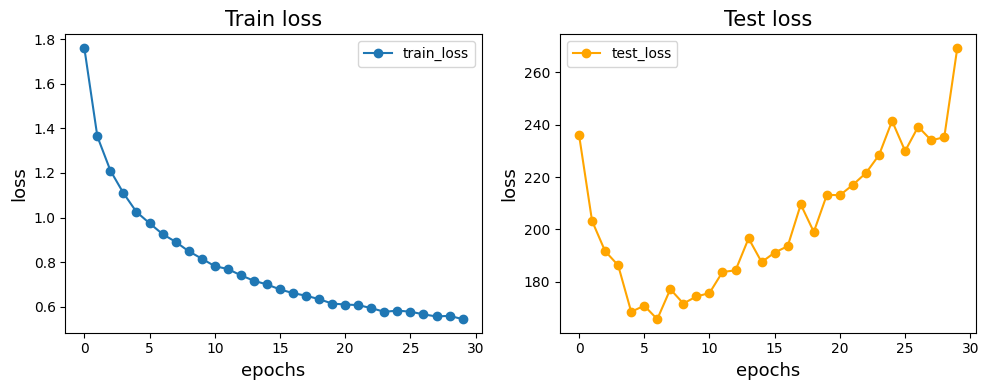

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# primo subplot
axs[0].set_title("Train loss", fontsize=15)
axs[0].plot(train_losses, '-o', label='train_loss')
axs[0].set_xlabel("epochs", fontsize=13)
axs[0].set_ylabel("loss", fontsize=13)
axs[0].legend()

# secondo subplot
axs[1].set_title("Test loss", fontsize=15)
axs[1].plot(test_losses, '-o', label='test_loss', color = 'orange')
axs[1].set_xlabel("epochs", fontsize=13)
axs[1].set_ylabel("loss", fontsize=13)
axs[1].legend()


plt.tight_layout()
plt.show()

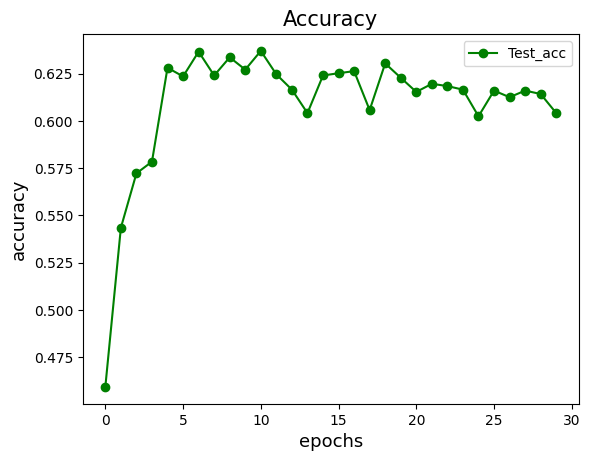

In [ ]:
plt.title("Accuracy", fontsize=15)
plt.plot(test_accuracies, "-o", label = 'Test_acc', color = 'green')
plt.xlabel("epochs", fontsize=13)
plt.ylabel("accuracy", fontsize=13)
plt.legend()

# SCHEDULER

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # DIFFERENZA MNIST: definito layer di pool e viene chiamato sempre il solito più volte, lo posso chiamare più volte perché non ha paramentri da dichiarare, LE CONV DEVONO ESSERE DISTINTE
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # DIFFERENZA MNIST: uscita ultimo fc, queste uscite si chiamano logit, uscita della rete, prima di una softmax
        return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # la diamo alla gpu
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
""" Example of usage
    >>> scheduler = MultiStepLR(optimizer, milestones=[30,80], gamma=0.1) # il milestone è l'id dell'epoca in cui deve essere diminuito il lr del fattore del valore di gamma
    >>> for epoch in range(100):
    >>>     train(...)
    >>>     test(...)
    >>>     scheduler.step()
"""

from torch.optim.lr_scheduler import MultiStepLR
# from torch.optim.lr_scheduler import StepLR

train_losses = []
test_losses = []
test_accuracies = []



batch_size = 64
lr = 0.01 #0.01   0.1 0.001 0.0001
epochs = 30 #30


In [ ]:
criterion = nn.CrossEntropyLoss(weight=None) # la loss prende in input i logit e restituisce in output la softmax cross-entropy
optimizer = optim.SGD(net.parameters(), lr = lr, momentum=0.9)

def train(model, device, trainloader, optimizer, epoch):
    model.train() # riguarda pytorch
    losses = []
    for epoch in range(1, epochs + 1):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize, fulcro della rete
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
              running_loss = 0.0

          losses.append(loss.item())
      return np.mean(losses)

In [ ]:
def test(model, device, testloader):
    model.eval() # modello in configurazione evaluation
    test_loss = 0
    correct = 0
    total = 0


    with torch.no_grad(): # torch velocizza la fase di test perchè non calcola i gradienti
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          test_loss += criterion(outputs, labels).item() # !!! REDUCTION non è negli argomenti (?)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


    test_acc = correct/len(testloader.dataset)

    return test_loss, test_acc

In [ ]:
scheduler = MultiStepLR(optimizer, milestones=[10, 22], gamma=0.1) # milestone 2,4, 20 epoche [3, 7]

learning_rates = []

for epoch in range(1, epochs + 1):
    train_loss = train(net, device, trainloader, optimizer, epoch)
    train_losses.append(train_loss)
    test_loss, test_acc = test(net, device, testloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)
    scheduler.step()

Accuracy of the network on the 10000 test images: 53 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 64 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy o

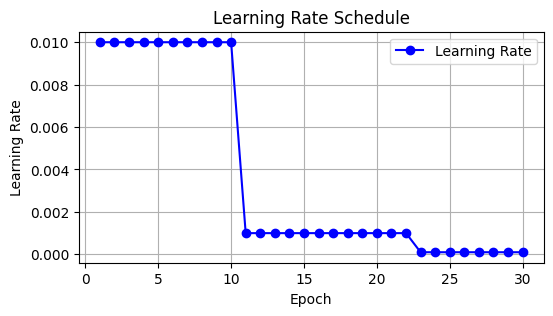

In [ ]:
# Plot the learning rate schedule
plt.figure(figsize=(6, 3))
plt.plot(range(1, epochs + 1), learning_rates, marker='o', linestyle='-', color='b', label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()
plt.grid(True)
plt.show()

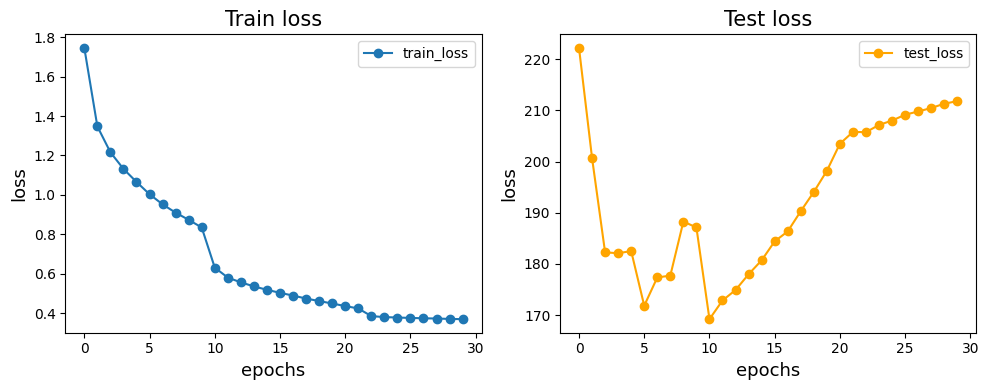

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# primo subplot
axs[0].set_title("Train loss", fontsize=15)
axs[0].plot(train_losses, '-o', label='train_loss')
axs[0].set_xlabel("epochs", fontsize=13)
axs[0].set_ylabel("loss", fontsize=13)
axs[0].legend()

# secondo subplot
axs[1].set_title("Test loss", fontsize=15)
axs[1].plot(test_losses, '-o', label='test_loss', color = 'orange')
axs[1].set_xlabel("epochs", fontsize=13)
axs[1].set_ylabel("loss", fontsize=13)
axs[1].legend()


plt.tight_layout()
plt.show()

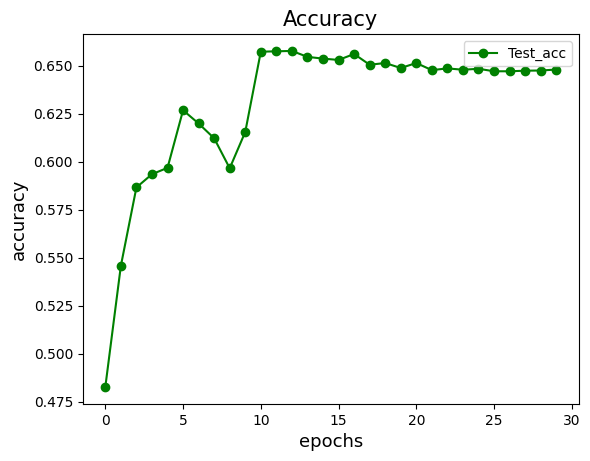

In [ ]:
plt.title("Accuracy", fontsize=15)
plt.plot(test_accuracies, "-o", label = 'Test_acc', color = 'green')
plt.xlabel("epochs", fontsize=13)
plt.ylabel("accuracy", fontsize=13)
plt.legend()

## Exercise 2

Use some data augmentation to reduce overfitting.

All the transformations supported by PyTorch can be found at https://pytorch.org/vision/0.9/transforms.html#compositions-of-transforms

- Which transformations are the most impactfull on the accuracies?

Try to plot the effect of the transformations!

fare data augmentation, random crop, random flip, totensor, normalize

vedere come cambiano le performance. nel report fare le cose separate, train separati per data augmentation, scheduler etc.

# RANDOM CROP + NORMALIZE

In [ ]:
transform = transforms.Compose([transforms.RandomCrop(32, padding=10, pad_if_needed=True, fill=0, padding_mode='constant'),
                        transforms.ToTensor(),
                        transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


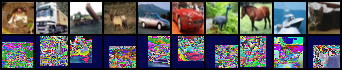

In [ ]:
# plot real and augmented images
from torchvision.utils import make_grid
notransform = transforms.Compose([transforms.ToTensor()])
non_augmented = torchvision.datasets.CIFAR10(root='./data', train=True, transform=notransform)

imgs = torch.stack((*[non_augmented[i][0] for i in range(10)],
                    *[trainset[i][0] for i in range(10)]))
grid = make_grid(imgs, nrow=10)

transforms.ToPILImage()(grid)

# vediamo l'effetto della trasformazione

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # DIFFERENZA MNIST: definito layer di pool e viene chiamato sempre il solito più volte, lo posso chiamare più volte perché non ha paramentri da dichiarare, LE CONV DEVONO ESSERE DISTINTE
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # DIFFERENZA MNIST: uscita ultimo fc, queste uscite si chiamano logit, uscita della rete, prima di una softmax
        return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # la diamo alla gpu
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR
# from torch.optim.lr_scheduler import StepLR

train_losses = []
test_losses = []
test_accuracies = []



batch_size = 64
lr = 0.01 #0.01   0.1 0.001 0.0001
epochs = 30 #30

In [ ]:
criterion = nn.CrossEntropyLoss(weight=None) # la loss prende in input i logit e restituisce in output la softmax cross-entropy
optimizer = optim.SGD(net.parameters(), lr = lr, momentum=0.9)

def train(model, device, trainloader, optimizer, epoch):
    model.train() # riguarda pytorch
    losses = []
    for epoch in range(1, epochs + 1):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize, fulcro della rete
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
              running_loss = 0.0

          losses.append(loss.item())
      return np.mean(losses)

In [ ]:
def test(model, device, testloader):
    model.eval() # modello in configurazione evaluation
    test_loss = 0
    correct = 0
    total = 0


    with torch.no_grad(): # torch velocizza la fase di test perchè non calcola i gradienti
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          test_loss += criterion(outputs, labels).item() # !!! REDUCTION non è negli argomenti (?)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


    test_acc = correct/len(testloader.dataset)

    return test_loss, test_acc

In [ ]:
for epoch in range(1, epochs + 1):
    train_loss = train(net, device, trainloader, optimizer, epoch)
    train_losses.append(train_loss)
    test_loss, test_acc = test(net, device, testloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

Accuracy of the network on the 10000 test images: 29 %
Accuracy of the network on the 10000 test images: 37 %
Accuracy of the network on the 10000 test images: 40 %
Accuracy of the network on the 10000 test images: 39 %
Accuracy of the network on the 10000 test images: 44 %
Accuracy of the network on the 10000 test images: 44 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 44 %
Accuracy of the network on the 10000 test images: 47 %
Accuracy of the network on the 10000 test images: 48 %
Accuracy of the network on the 10000 test images: 48 %
Accuracy of the network on the 10000 test images: 47 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 51 %
Accuracy of the network on the 10000 test images: 50 %
Accuracy o

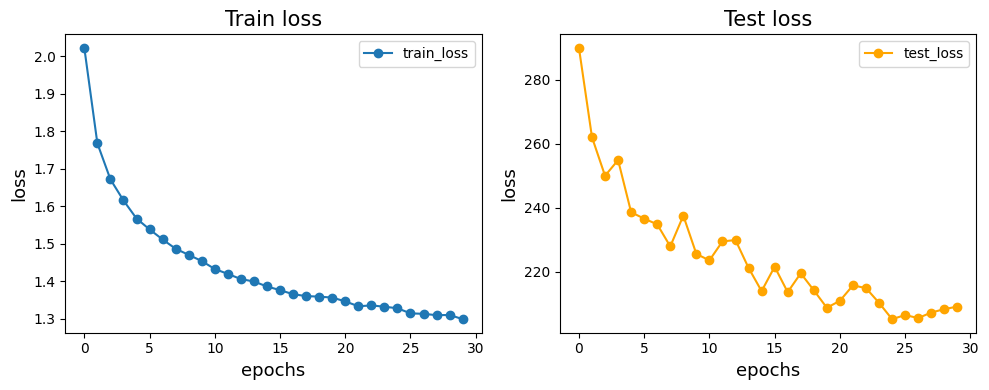

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# primo subplot
axs[0].set_title("Train loss", fontsize=15)
axs[0].plot(train_losses, '-o', label='train_loss')
axs[0].set_xlabel("epochs", fontsize=13)
axs[0].set_ylabel("loss", fontsize=13)
axs[0].legend()

# secondo subplot
axs[1].set_title("Test loss", fontsize=15)
axs[1].plot(test_losses, '-o', label='test_loss', color = 'orange')
axs[1].set_xlabel("epochs", fontsize=13)
axs[1].set_ylabel("loss", fontsize=13)
axs[1].legend()


plt.tight_layout()
plt.show()

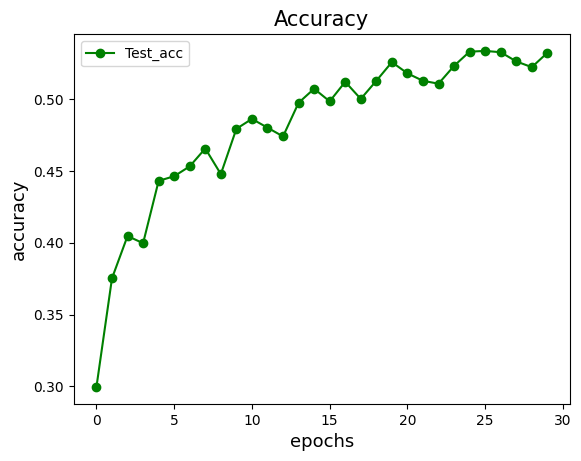

In [ ]:
plt.title("Accuracy", fontsize=15)
plt.plot(test_accuracies, "-o", label = 'Test_acc', color = 'green')
plt.xlabel("epochs", fontsize=13)
plt.ylabel("accuracy", fontsize=13)
plt.legend()

Now use it to train the your model

# RANDOM HORIZONTAL FLIP + NORMALIZE

In [ ]:
transform = transforms.Compose([transforms.RandomHorizontalFlip(p=0.5),
                        transforms.ToTensor(),
                        transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


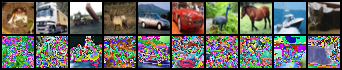

In [ ]:
# plot real and augmented images
from torchvision.utils import make_grid
notransform = transforms.Compose([transforms.ToTensor()])
non_augmented = torchvision.datasets.CIFAR10(root='./data', train=True, transform=notransform)

imgs = torch.stack((*[non_augmented[i][0] for i in range(10)],
                    *[trainset[i][0] for i in range(10)]))
grid = make_grid(imgs, nrow=10)

transforms.ToPILImage()(grid)

# vediamo l'effetto della trasformazione

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # DIFFERENZA MNIST: definito layer di pool e viene chiamato sempre il solito più volte, lo posso chiamare più volte perché non ha paramentri da dichiarare, LE CONV DEVONO ESSERE DISTINTE
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # DIFFERENZA MNIST: uscita ultimo fc, queste uscite si chiamano logit, uscita della rete, prima di una softmax
        return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # la diamo alla gpu
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR
# from torch.optim.lr_scheduler import StepLR

train_losses = []
test_losses = []
test_accuracies = []



batch_size = 64
lr = 0.01 #0.01   0.1 0.001 0.0001
epochs = 30 #30

In [ ]:
criterion = nn.CrossEntropyLoss(weight=None) # la loss prende in input i logit e restituisce in output la softmax cross-entropy
optimizer = optim.SGD(net.parameters(), lr = lr, momentum=0.9)

def train(model, device, trainloader, optimizer, epoch):
    model.train() # riguarda pytorch
    losses = []
    for epoch in range(1, epochs + 1):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize, fulcro della rete
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
              running_loss = 0.0

          losses.append(loss.item())
      return np.mean(losses)

In [ ]:
def test(model, device, testloader):
    model.eval() # modello in configurazione evaluation
    test_loss = 0
    correct = 0
    total = 0


    with torch.no_grad(): # torch velocizza la fase di test perchè non calcola i gradienti
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          test_loss += criterion(outputs, labels).item() # !!! REDUCTION non è negli argomenti (?)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


    test_acc = correct/len(testloader.dataset)

    return test_loss, test_acc

In [ ]:
for epoch in range(1, epochs + 1):
    train_loss = train(net, device, trainloader, optimizer, epoch)
    train_losses.append(train_loss)
    test_loss, test_acc = test(net, device, testloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 64 %
Accuracy of the network on the 10000 test images: 64 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 64 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy o

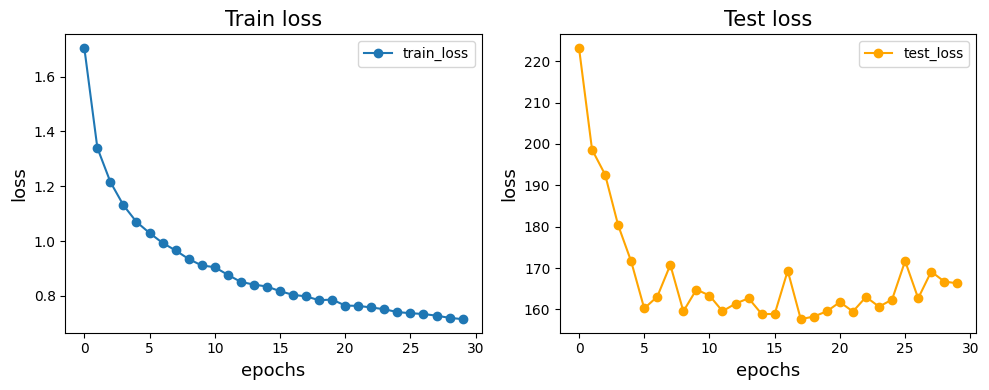

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# primo subplot
axs[0].set_title("Train loss", fontsize=15)
axs[0].plot(train_losses, '-o', label='train_loss')
axs[0].set_xlabel("epochs", fontsize=13)
axs[0].set_ylabel("loss", fontsize=13)
axs[0].legend()

# secondo subplot
axs[1].set_title("Test loss", fontsize=15)
axs[1].plot(test_losses, '-o', label='test_loss', color = 'orange')
axs[1].set_xlabel("epochs", fontsize=13)
axs[1].set_ylabel("loss", fontsize=13)
axs[1].legend()


plt.tight_layout()
plt.show()

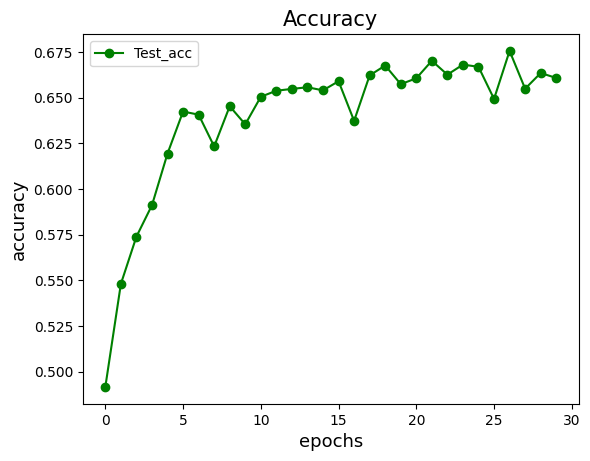

In [ ]:
plt.title("Accuracy", fontsize=15)
plt.plot(test_accuracies, "-o", label = 'Test_acc', color = 'green')
plt.xlabel("epochs", fontsize=13)
plt.ylabel("accuracy", fontsize=13)
plt.legend()

# COLOR JITTER + NORMALIZE

In [ ]:
transform = transforms.Compose([transforms.ColorJitter(brightness=[3, 10], contrast=[3, 10], saturation=[3, 10], hue=0.5),
                        transforms.ToTensor(),
                        transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


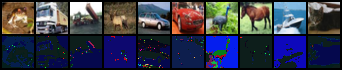

In [ ]:
# plot real and augmented images
from torchvision.utils import make_grid
notransform = transforms.Compose([transforms.ToTensor()])
non_augmented = torchvision.datasets.CIFAR10(root='./data', train=True, transform=notransform)

imgs = torch.stack((*[non_augmented[i][0] for i in range(10)],
                    *[trainset[i][0] for i in range(10)]))
grid = make_grid(imgs, nrow=10)

transforms.ToPILImage()(grid)

# vediamo l'effetto della trasformazione

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # DIFFERENZA MNIST: definito layer di pool e viene chiamato sempre il solito più volte, lo posso chiamare più volte perché non ha paramentri da dichiarare, LE CONV DEVONO ESSERE DISTINTE
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # DIFFERENZA MNIST: uscita ultimo fc, queste uscite si chiamano logit, uscita della rete, prima di una softmax
        return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # la diamo alla gpu
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR
# from torch.optim.lr_scheduler import StepLR

train_losses = []
test_losses = []
test_accuracies = []



batch_size = 64
lr = 0.01 #0.01   0.1 0.001 0.0001
epochs = 30 #30

In [ ]:
criterion = nn.CrossEntropyLoss(weight=None) # la loss prende in input i logit e restituisce in output la softmax cross-entropy
optimizer = optim.SGD(net.parameters(), lr = lr, momentum=0.9)

def train(model, device, trainloader, optimizer, epoch):
    model.train() # riguarda pytorch
    losses = []
    for epoch in range(1, epochs + 1):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize, fulcro della rete
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
              running_loss = 0.0

          losses.append(loss.item())
      return np.mean(losses)

In [ ]:
def test(model, device, testloader):
    model.eval() # modello in configurazione evaluation
    test_loss = 0
    correct = 0
    total = 0


    with torch.no_grad(): # torch velocizza la fase di test perchè non calcola i gradienti
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          test_loss += criterion(outputs, labels).item() # !!! REDUCTION non è negli argomenti (?)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


    test_acc = correct/len(testloader.dataset)

    return test_loss, test_acc

In [ ]:
for epoch in range(1, epochs + 1):
    train_loss = train(net, device, trainloader, optimizer, epoch)
    train_losses.append(train_loss)
    test_loss, test_acc = test(net, device, testloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

Accuracy of the network on the 10000 test images: 32 %
Accuracy of the network on the 10000 test images: 37 %
Accuracy of the network on the 10000 test images: 40 %
Accuracy of the network on the 10000 test images: 39 %
Accuracy of the network on the 10000 test images: 43 %
Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 43 %
Accuracy of the network on the 10000 test images: 43 %
Accuracy of the network on the 10000 test images: 44 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 44 %
Accuracy of the network on the 10000 test images: 44 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 45 %
Accuracy o

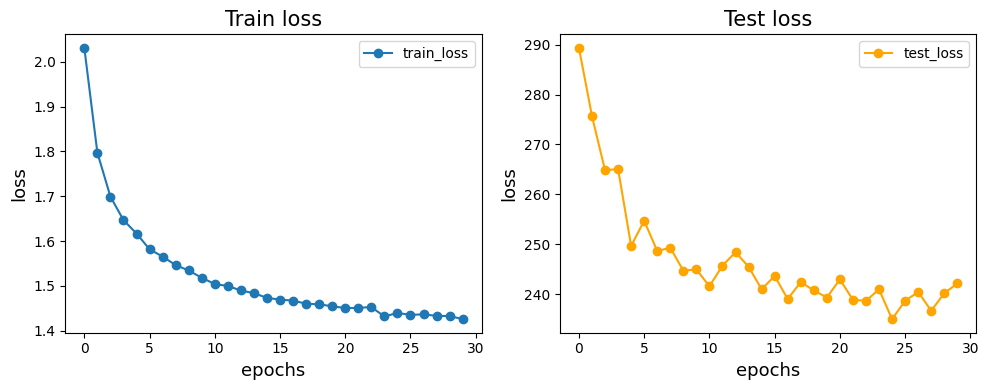

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# primo subplot
axs[0].set_title("Train loss", fontsize=15)
axs[0].plot(train_losses, '-o', label='train_loss')
axs[0].set_xlabel("epochs", fontsize=13)
axs[0].set_ylabel("loss", fontsize=13)
axs[0].legend()

# secondo subplot
axs[1].set_title("Test loss", fontsize=15)
axs[1].plot(test_losses, '-o', label='test_loss', color = 'orange')
axs[1].set_xlabel("epochs", fontsize=13)
axs[1].set_ylabel("loss", fontsize=13)
axs[1].legend()


plt.tight_layout()
plt.show()

In [ ]:
plt.title("Accuracy", fontsize=15)
plt.plot(test_accuracies, "-o", label = 'Test_acc', color = 'green')
plt.xlabel("epochs", fontsize=13)
plt.ylabel("accuracy", fontsize=13)
plt.legend()

## Exercise 3

lavorare sulla rete, cambiare il layer della rete (dropout, batchnorm) e utilizzare modelli pre-definiti (link) tipo resnet, alexnet...

A) Try to change the network architecture (e.g. use all linear layers) or network hyperparameters (e.g. dimensions of the CNN kernel, stride, padding).

B) Try also to compare performance of your model with performance of pre-defined network architecture.
There are a lot of pre-defined network architectures (e.g. ResNet, VGG, AlexNet, ...).

Some example can be found in https://pytorch.org/vision/0.9/models.html.

Specific CIFAR10 architectures are also in this public repository https://github.com/kuangliu/pytorch-cifar.

fare confronto con lo stesso scheduler e data augmentation con quelli che abbiamo fatto con la nostra rete

# DROPOUT

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                        transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


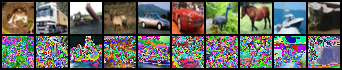

In [ ]:
# plot real and augmented images
from torchvision.utils import make_grid
notransform = transforms.Compose([transforms.ToTensor()])
non_augmented = torchvision.datasets.CIFAR10(root='./data', train=True, transform=notransform)

imgs = torch.stack((*[non_augmented[i][0] for i in range(10)],
                    *[trainset[i][0] for i in range(10)]))
grid = make_grid(imgs, nrow=10)

transforms.ToPILImage()(grid)

# vediamo l'effetto della trasformazione

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.dropout = nn.Dropout(p=0.4)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # DIFFERENZA MNIST: definito layer di pool e viene chiamato sempre il solito più volte, lo posso chiamare più volte perché non ha paramentri da dichiarare, LE CONV DEVONO ESSERE DISTINTE
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # DIFFERENZA MNIST: uscita ultimo fc, queste uscite si chiamano logit, uscita della rete, prima di una softmax
        return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # la diamo alla gpu
net.to(device)




Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR
# from torch.optim.lr_scheduler import StepLR

train_losses = []
test_losses = []
test_accuracies = []



batch_size = 64
lr = 0.01 #0.01   0.1 0.001 0.0001
epochs = 30 #30

In [ ]:
criterion = nn.CrossEntropyLoss(weight=None) # la loss prende in input i logit e restituisce in output la softmax cross-entropy
optimizer = optim.SGD(net.parameters(), lr = lr, momentum=0.9)

def train(model, device, trainloader, optimizer, epoch):
    model.train() # riguarda pytorch
    losses = []
    for epoch in range(1, epochs + 1):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize, fulcro della rete
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
              running_loss = 0.0

          losses.append(loss.item())
      return np.mean(losses)

In [ ]:
def test(model, device, testloader):
    model.eval() # modello in configurazione evaluation
    test_loss = 0
    correct = 0
    total = 0


    with torch.no_grad(): # torch velocizza la fase di test perchè non calcola i gradienti
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          test_loss += criterion(outputs, labels).item() # !!! REDUCTION non è negli argomenti (?)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


    test_acc = correct/len(testloader.dataset)

    return test_loss, test_acc

In [ ]:
for epoch in range(1, epochs + 1):
    train_loss = train(net, device, trainloader, optimizer, epoch)
    train_losses.append(train_loss)
    test_loss, test_acc = test(net, device, testloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

Accuracy of the network on the 10000 test images: 41 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 52 %
Accuracy of the network on the 10000 test images: 52 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 53 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy o

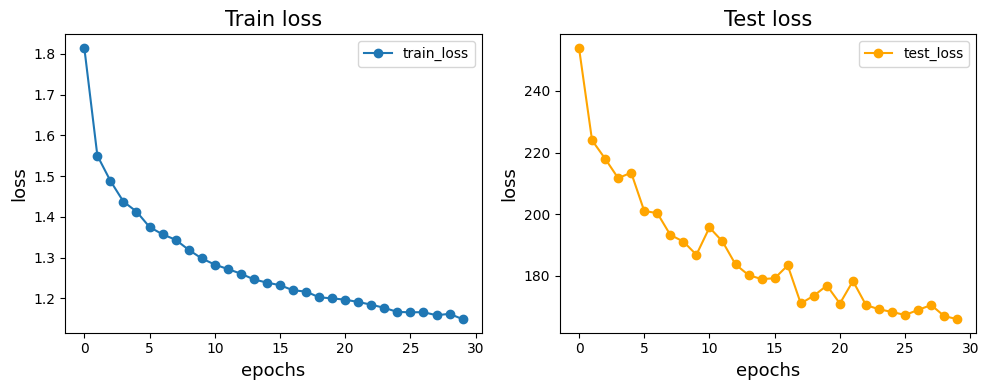

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# primo subplot
axs[0].set_title("Train loss", fontsize=15)
axs[0].plot(train_losses, '-o', label='train_loss')
axs[0].set_xlabel("epochs", fontsize=13)
axs[0].set_ylabel("loss", fontsize=13)
axs[0].legend()

# secondo subplot
axs[1].set_title("Test loss", fontsize=15)
axs[1].plot(test_losses, '-o', label='test_loss', color = 'orange')
axs[1].set_xlabel("epochs", fontsize=13)
axs[1].set_ylabel("loss", fontsize=13)
axs[1].legend()


plt.tight_layout()
plt.show()

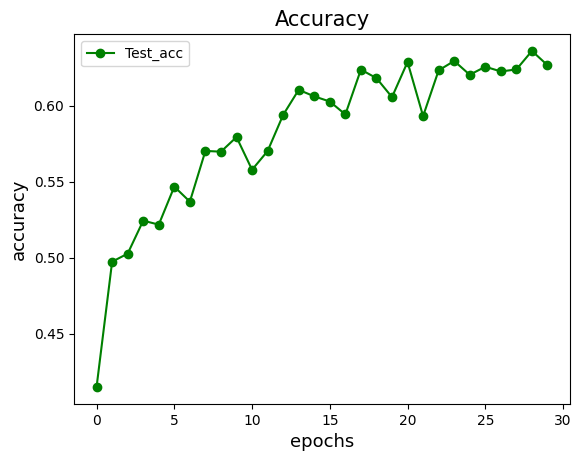

In [ ]:
plt.title("Accuracy", fontsize=15)
plt.plot(test_accuracies, "-o", label = 'Test_acc', color = 'green')
plt.xlabel("epochs", fontsize=13)
plt.ylabel("accuracy", fontsize=13)
plt.legend()

# DROPOUT + SCHEDULER

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                        transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


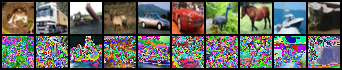

In [ ]:
# plot real and augmented images
from torchvision.utils import make_grid
notransform = transforms.Compose([transforms.ToTensor()])
non_augmented = torchvision.datasets.CIFAR10(root='./data', train=True, transform=notransform)

imgs = torch.stack((*[non_augmented[i][0] for i in range(10)],
                    *[trainset[i][0] for i in range(10)]))
grid = make_grid(imgs, nrow=10)

transforms.ToPILImage()(grid)

# vediamo l'effetto della trasformazione

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.dropout = nn.Dropout(p=0.4)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # DIFFERENZA MNIST: definito layer di pool e viene chiamato sempre il solito più volte, lo posso chiamare più volte perché non ha paramentri da dichiarare, LE CONV DEVONO ESSERE DISTINTE
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # DIFFERENZA MNIST: uscita ultimo fc, queste uscite si chiamano logit, uscita della rete, prima di una softmax
        return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # la diamo alla gpu
net.to(device)




Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR
# from torch.optim.lr_scheduler import StepLR

train_losses = []
test_losses = []
test_accuracies = []



batch_size = 64
lr = 0.01 #0.01   0.1 0.001 0.0001
epochs = 30 #30

In [ ]:
criterion = nn.CrossEntropyLoss(weight=None) # la loss prende in input i logit e restituisce in output la softmax cross-entropy
optimizer = optim.SGD(net.parameters(), lr = lr, momentum=0.9)

def train(model, device, trainloader, optimizer, epoch):
    model.train() # riguarda pytorch
    losses = []
    for epoch in range(1, epochs + 1):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize, fulcro della rete
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
              running_loss = 0.0

          losses.append(loss.item())
      return np.mean(losses)

In [ ]:
def test(model, device, testloader):
    model.eval() # modello in configurazione evaluation
    test_loss = 0
    correct = 0
    total = 0


    with torch.no_grad(): # torch velocizza la fase di test perchè non calcola i gradienti
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          test_loss += criterion(outputs, labels).item() # !!! REDUCTION non è negli argomenti (?)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


    test_acc = correct/len(testloader.dataset)

    return test_loss, test_acc

In [ ]:
scheduler = MultiStepLR(optimizer, milestones=[10, 22], gamma=0.1) # milestone 2,4, 20 epoche [3, 7]

learning_rates = []

for epoch in range(1, epochs + 1):
    train_loss = train(net, device, trainloader, optimizer, epoch)
    train_losses.append(train_loss)
    test_loss, test_acc = test(net, device, testloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)
    scheduler.step()

Accuracy of the network on the 10000 test images: 42 %
Accuracy of the network on the 10000 test images: 49 %
Accuracy of the network on the 10000 test images: 51 %
Accuracy of the network on the 10000 test images: 53 %
Accuracy of the network on the 10000 test images: 52 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy o

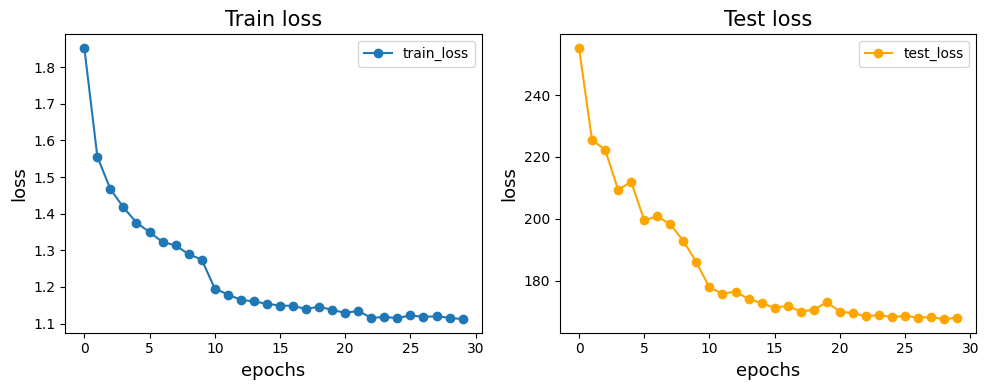

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# primo subplot
axs[0].set_title("Train loss", fontsize=15)
axs[0].plot(train_losses, '-o', label='train_loss')
axs[0].set_xlabel("epochs", fontsize=13)
axs[0].set_ylabel("loss", fontsize=13)
axs[0].legend()

# secondo subplot
axs[1].set_title("Test loss", fontsize=15)
axs[1].plot(test_losses, '-o', label='test_loss', color = 'orange')
axs[1].set_xlabel("epochs", fontsize=13)
axs[1].set_ylabel("loss", fontsize=13)
axs[1].legend()


plt.tight_layout()
plt.show()

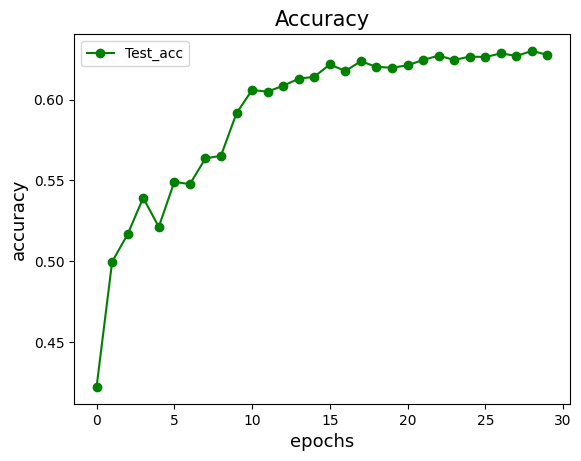

In [ ]:
plt.title("Accuracy", fontsize=15)
plt.plot(test_accuracies, "-o", label = 'Test_acc', color = 'green')
plt.xlabel("epochs", fontsize=13)
plt.ylabel("accuracy", fontsize=13)
plt.legend()

Accuracy of the network on the 10000 test images: 39 %
Accuracy of the network on the 10000 test images: 46 %
Accuracy of the network on the 10000 test images: 51 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 54 %
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 55 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 61 %
Accuracy of the network on the 10000 test images: 61 %

# BATCH NORMALIZATION

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                        transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


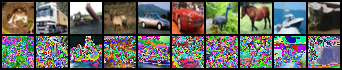

In [ ]:
# plot real and augmented images
from torchvision.utils import make_grid
notransform = transforms.Compose([transforms.ToTensor()])
non_augmented = torchvision.datasets.CIFAR10(root='./data', train=True, transform=notransform)

imgs = torch.stack((*[non_augmented[i][0] for i in range(10)],
                    *[trainset[i][0] for i in range(10)]))
grid = make_grid(imgs, nrow=10)

transforms.ToPILImage()(grid)

# vediamo l'effetto della trasformazione

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.bn1 = nn.BatchNorm1d(120)
        self.bn2 = nn.BatchNorm1d(84)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # DIFFERENZA MNIST: definito layer di pool e viene chiamato sempre il solito più volte, lo posso chiamare più volte perché non ha paramentri da dichiarare, LE CONV DEVONO ESSERE DISTINTE
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = F.relu(self.fc2(x))
        x = self.bn2(x)
        x = self.fc3(x) # DIFFERENZA MNIST: uscita ultimo fc, queste uscite si chiamano logit, uscita della rete, prima di una softmax
        return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # la diamo alla gpu
net.to(device)




Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR
# from torch.optim.lr_scheduler import StepLR

train_losses = []
test_losses = []
test_accuracies = []



batch_size = 64
lr = 0.01 #0.01   0.1 0.001 0.0001
epochs = 30 #30

In [ ]:
criterion = nn.CrossEntropyLoss(weight=None) # la loss prende in input i logit e restituisce in output la softmax cross-entropy
optimizer = optim.SGD(net.parameters(), lr = lr, momentum=0.9)

def train(model, device, trainloader, optimizer, epoch):
    model.train() # riguarda pytorch
    losses = []
    for epoch in range(1, epochs + 1):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize, fulcro della rete
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
              running_loss = 0.0

          losses.append(loss.item())
      return np.mean(losses)

In [ ]:
def test(model, device, testloader):
    model.eval() # modello in configurazione evaluation
    test_loss = 0
    correct = 0
    total = 0


    with torch.no_grad(): # torch velocizza la fase di test perchè non calcola i gradienti
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          test_loss += criterion(outputs, labels).item() # !!! REDUCTION non è negli argomenti (?)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


    test_acc = correct/len(testloader.dataset)

    return test_loss, test_acc

In [ ]:
for epoch in range(1, epochs + 1):
    train_loss = train(net, device, trainloader, optimizer, epoch)
    train_losses.append(train_loss)
    test_loss, test_acc = test(net, device, testloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

Accuracy of the network on the 10000 test images: 51 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 56 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 64 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 64 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy o

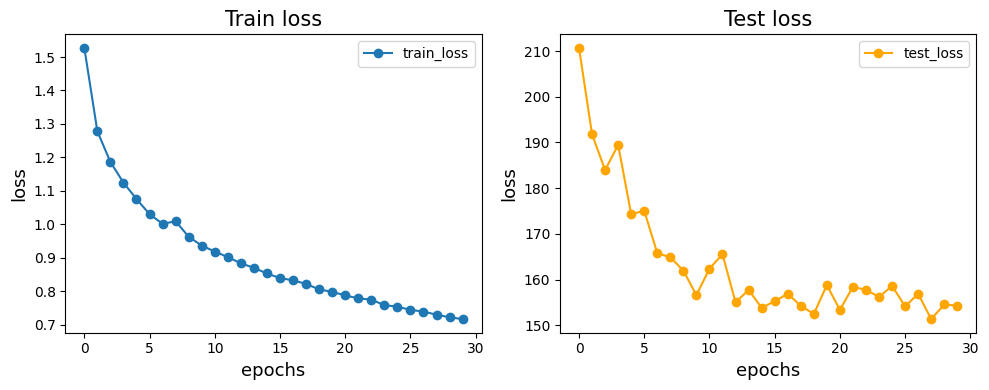

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# primo subplot
axs[0].set_title("Train loss", fontsize=15)
axs[0].plot(train_losses, '-o', label='train_loss')
axs[0].set_xlabel("epochs", fontsize=13)
axs[0].set_ylabel("loss", fontsize=13)
axs[0].legend()

# secondo subplot
axs[1].set_title("Test loss", fontsize=15)
axs[1].plot(test_losses, '-o', label='test_loss', color = 'orange')
axs[1].set_xlabel("epochs", fontsize=13)
axs[1].set_ylabel("loss", fontsize=13)
axs[1].legend()


plt.tight_layout()
plt.show()

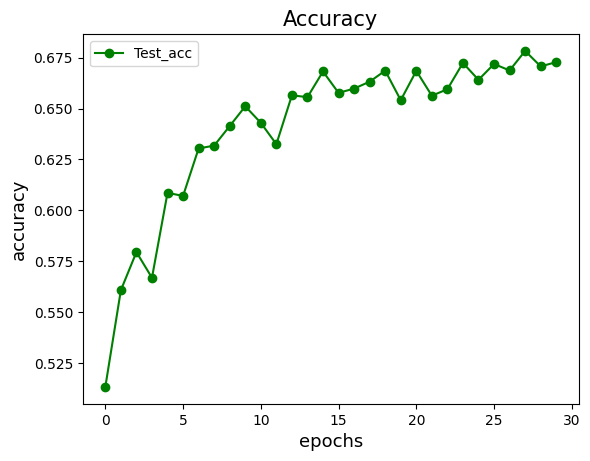

In [ ]:
plt.title("Accuracy", fontsize=15)
plt.plot(test_accuracies, "-o", label = 'Test_acc', color = 'green')
plt.xlabel("epochs", fontsize=13)
plt.ylabel("accuracy", fontsize=13)
plt.legend()

# BATCH NORMALIZATION + SCHEDULER

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                        transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768))])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


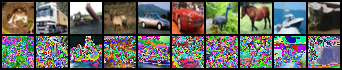

In [ ]:
# plot real and augmented images
from torchvision.utils import make_grid
notransform = transforms.Compose([transforms.ToTensor()])
non_augmented = torchvision.datasets.CIFAR10(root='./data', train=True, transform=notransform)

imgs = torch.stack((*[non_augmented[i][0] for i in range(10)],
                    *[trainset[i][0] for i in range(10)]))
grid = make_grid(imgs, nrow=10)

transforms.ToPILImage()(grid)

# vediamo l'effetto della trasformazione

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.bn1 = nn.BatchNorm1d(120)
        self.bn2 = nn.BatchNorm1d(84)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # DIFFERENZA MNIST: definito layer di pool e viene chiamato sempre il solito più volte, lo posso chiamare più volte perché non ha paramentri da dichiarare, LE CONV DEVONO ESSERE DISTINTE
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = F.relu(self.fc2(x))
        x = self.bn2(x)
        x = self.fc3(x) # DIFFERENZA MNIST: uscita ultimo fc, queste uscite si chiamano logit, uscita della rete, prima di una softmax
        return x


net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # la diamo alla gpu
net.to(device)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
from torch.optim.lr_scheduler import MultiStepLR
# from torch.optim.lr_scheduler import StepLR

train_losses = []
test_losses = []
test_accuracies = []



batch_size = 64
lr = 0.01 #0.01   0.1 0.001 0.0001
epochs = 30 #30

In [ ]:
criterion = nn.CrossEntropyLoss(weight=None) # la loss prende in input i logit e restituisce in output la softmax cross-entropy
optimizer = optim.SGD(net.parameters(), lr = lr, momentum=0.9)

def train(model, device, trainloader, optimizer, epoch):
    model.train() # riguarda pytorch
    losses = []
    for epoch in range(1, epochs + 1):  # loop over the dataset multiple times

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [inputs, labels]
          inputs, labels = data
          inputs = inputs.to(device)
          labels = labels.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

          # forward + backward + optimize, fulcro della rete
          outputs = net(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # print statistics
          running_loss += loss.item()
          if i % 2000 == 1999:    # print every 2000 mini-batches
              print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
              running_loss = 0.0

          losses.append(loss.item())
      return np.mean(losses)

In [ ]:
def test(model, device, testloader):
    model.eval() # modello in configurazione evaluation
    test_loss = 0
    correct = 0
    total = 0


    with torch.no_grad(): # torch velocizza la fase di test perchè non calcola i gradienti
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          test_loss += criterion(outputs, labels).item() # !!! REDUCTION non è negli argomenti (?)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


    test_acc = correct/len(testloader.dataset)

    return test_loss, test_acc

In [ ]:
scheduler = MultiStepLR(optimizer, milestones=[10, 22], gamma=0.1) # milestone 2,4, 20 epoche [3, 7]

learning_rates = []

for epoch in range(1, epochs + 1):
    train_loss = train(net, device, trainloader, optimizer, epoch)
    train_losses.append(train_loss)
    test_loss, test_acc = test(net, device, testloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)
    scheduler.step()

Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 58 %
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 60 %
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 64 %
Accuracy of the network on the 10000 test images: 63 %
Accuracy of the network on the 10000 test images: 65 %
Accuracy of the network on the 10000 test images: 66 %
Accuracy of the network on the 10000 test images: 67 %
Accuracy of the network on the 10000 test images: 68 %
Accuracy of the network on the 10000 test images: 68 %
Accuracy of the network on the 10000 test images: 68 %
Accuracy of the network on the 10000 test images: 68 %
Accuracy of the network on the 10000 test images: 68 %
Accuracy of the network on the 10000 test images: 68 %
Accuracy of the network on the 10000 test images: 68 %
Accuracy o

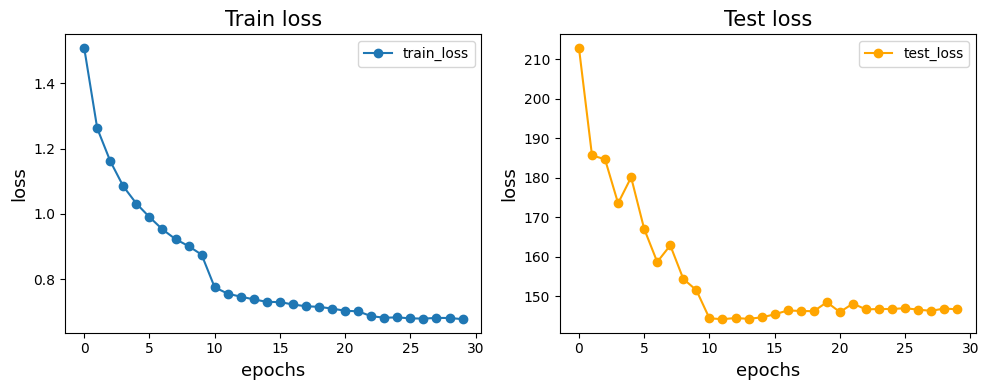

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# primo subplot
axs[0].set_title("Train loss", fontsize=15)
axs[0].plot(train_losses, '-o', label='train_loss')
axs[0].set_xlabel("epochs", fontsize=13)
axs[0].set_ylabel("loss", fontsize=13)
axs[0].legend()

# secondo subplot
axs[1].set_title("Test loss", fontsize=15)
axs[1].plot(test_losses, '-o', label='test_loss', color = 'orange')
axs[1].set_xlabel("epochs", fontsize=13)
axs[1].set_ylabel("loss", fontsize=13)
axs[1].legend()


plt.tight_layout()
plt.show()

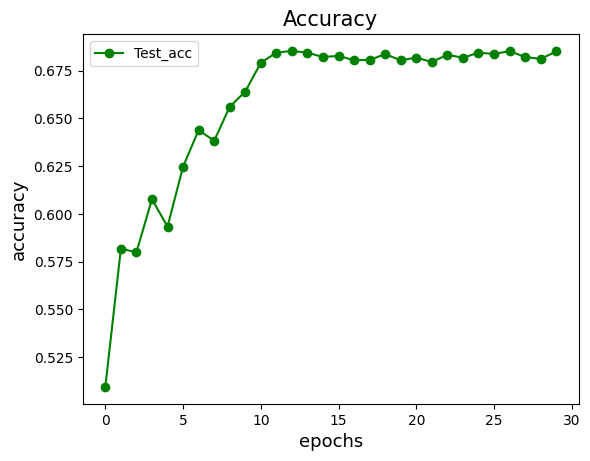

In [ ]:
plt.title("Accuracy", fontsize=15)
plt.plot(test_accuracies, "-o", label = 'Test_acc', color = 'green')
plt.xlabel("epochs", fontsize=13)
plt.ylabel("accuracy", fontsize=13)
plt.legend()

# RESNET18

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

In [ ]:
batch_size = 64
lr = 0.01 # 0.01
epochs = 30
device = torch.device("cuda") # to use the GPU

In [ ]:
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768)])


# non faccio nessuna trasformazione a test time
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.49139968, 0.48215827, 0.44653124), (0.24703233, 0.24348505, 0.26158768)),
])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)


#trainset, valset = torch.utils.data.random_split(dataset, [40000, 10000])


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2,
                                          drop_last=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=False, num_workers=2,
                                          drop_last=False)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2,
                                          drop_last=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
net = models.resnet18(pretrained=True)

net.fc = nn.Linear(512, 10)


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

net.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 118MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    losses = []
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 500 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        losses.append(loss.item())
    return np.mean(losses)



def test(model, device, test_loader, val=False):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    mode = "Val" if val else "Test"
    print('\{} set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        mode,
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    test_acc = correct / len(test_loader.dataset)
    return test_loss, test_acc


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9, weight_decay=1e-04)

In [ ]:
train_losses = []
val_losses = []
val_accuracies = []
model_state_dict = None

for epoch in range(1, epochs + 1):
    train_loss = train(net, device, trainloader, optimizer, epoch)
    train_losses.append(train_loss)
    test_loss, test_acc = test(net, device, valloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)


Train Epoch: 1 [0/40000 (0%)]	Loss: 2.729869
Train Epoch: 1 [32000/40000 (80%)]	Loss: 1.416748
\Test set: Average loss: 151.0325, Accuracy: 6680/10000 (67%)

Train Epoch: 2 [0/40000 (0%)]	Loss: 0.891843
Train Epoch: 2 [32000/40000 (80%)]	Loss: 1.230459
\Test set: Average loss: 258.0719, Accuracy: 6156/10000 (62%)

Train Epoch: 3 [0/40000 (0%)]	Loss: 0.900297
Train Epoch: 3 [32000/40000 (80%)]	Loss: 0.616012
\Test set: Average loss: 113.2505, Accuracy: 7530/10000 (75%)

Train Epoch: 4 [0/40000 (0%)]	Loss: 0.741587
Train Epoch: 4 [32000/40000 (80%)]	Loss: 0.610958
\Test set: Average loss: 110.5638, Accuracy: 7588/10000 (76%)

Train Epoch: 5 [0/40000 (0%)]	Loss: 0.650139
Train Epoch: 5 [32000/40000 (80%)]	Loss: 0.722282
\Test set: Average loss: 102.3982, Accuracy: 7766/10000 (78%)

Train Epoch: 6 [0/40000 (0%)]	Loss: 0.570123
Train Epoch: 6 [32000/40000 (80%)]	Loss: 0.736152
\Test set: Average loss: 100.2828, Accuracy: 7821/10000 (78%)

Train Epoch: 7 [0/40000 (0%)]	Loss: 0.596313
Train E

Train Epoch: 1 [0/40000 (0%)]	Loss: 2.729869
Train Epoch: 1 [32000/40000 (80%)]	Loss: 1.416748
\Test set: Average loss: 151.0325, Accuracy: 6680/10000 (67%)

Train Epoch: 2 [0/40000 (0%)]	Loss: 0.891843
Train Epoch: 2 [32000/40000 (80%)]	Loss: 1.230459
\Test set: Average loss: 258.0719, Accuracy: 6156/10000 (62%)

Train Epoch: 3 [0/40000 (0%)]	Loss: 0.900297
Train Epoch: 3 [32000/40000 (80%)]	Loss: 0.616012
\Test set: Average loss: 113.2505, Accuracy: 7530/10000 (75%)

Train Epoch: 4 [0/40000 (0%)]	Loss: 0.741587
Train Epoch: 4 [32000/40000 (80%)]	Loss: 0.610958
\Test set: Average loss: 110.5638, Accuracy: 7588/10000 (76%)

Train Epoch: 5 [0/40000 (0%)]	Loss: 0.650139
Train Epoch: 5 [32000/40000 (80%)]	Loss: 0.722282
\Test set: Average loss: 102.3982, Accuracy: 7766/10000 (78%)

Train Epoch: 6 [0/40000 (0%)]	Loss: 0.570123
Train Epoch: 6 [32000/40000 (80%)]	Loss: 0.736152
\Test set: Average loss: 100.2828, Accuracy: 7821/10000 (78%)

Train Epoch: 7 [0/40000 (0%)]	Loss: 0.596313
Train Epoch: 7 [32000/40000 (80%)]	Loss: 0.484075
\Test set: Average loss: 97.9845, Accuracy: 7862/10000 (79%)

Train Epoch: 8 [0/40000 (0%)]	Loss: 0.418555
Train Epoch: 8 [32000/40000 (80%)]	Loss: 0.410945
\Test set: Average loss: 98.8947, Accuracy: 7909/10000 (79%)

Train Epoch: 9 [0/40000 (0%)]	Loss: 0.520667
Train Epoch: 9 [32000/40000 (80%)]	Loss: 0.596058
\Test set: Average loss: 92.0269, Accuracy: 8022/10000 (80%)

Train Epoch: 10 [0/40000 (0%)]	Loss: 0.608063
Train Epoch: 10 [32000/40000 (80%)]	Loss: 0.510540
\Test set: Average loss: 96.7774, Accuracy: 7918/10000 (79%)

Train Epoch: 11 [0/40000 (0%)]	Loss: 0.374679
Train Epoch: 11 [32000/40000 (80%)]	Loss: 0.609824
\Test set: Average loss: 88.3251, Accuracy: 8071/10000 (81%)

Train Epoch: 12 [0/40000 (0%)]	Loss: 0.412059
Train Epoch: 12 [32000/40000 (80%)]	Loss: 0.473537
\Test set: Average loss: 86.5136, Accuracy: 8136/10000 (81%)

Train Epoch: 13 [0/40000 (0%)]	Loss: 0.316234
Train Epoch: 13 [32000/40000 (80%)]	Loss: 0.204606
\Test set: Average loss: 85.2296, Accuracy: 8162/10000 (82%)

Train Epoch: 14 [0/40000 (0%)]	Loss: 0.460441
Train Epoch: 14 [32000/40000 (80%)]	Loss: 0.330867
\Test set: Average loss: 90.4843, Accuracy: 8085/10000 (81%)

Train Epoch: 15 [0/40000 (0%)]	Loss: 0.259542
Train Epoch: 15 [32000/40000 (80%)]	Loss: 0.375908
\Test set: Average loss: 81.4320, Accuracy: 8274/10000 (83%)

Train Epoch: 16 [0/40000 (0%)]	Loss: 0.501520
Train Epoch: 16 [32000/40000 (80%)]	Loss: 0.618912
\Test set: Average loss: 83.6108, Accuracy: 8214/10000 (82%)

Train Epoch: 17 [0/40000 (0%)]	Loss: 0.377755
Train Epoch: 17 [32000/40000 (80%)]	Loss: 0.246171
\Test set: Average loss: 90.7640, Accuracy: 8085/10000 (81%)

Train Epoch: 18 [0/40000 (0%)]	Loss: 0.465660
Train Epoch: 18 [32000/40000 (80%)]	Loss: 0.300481
\Test set: Average loss: 79.9142, Accuracy: 8272/10000 (83%)

Train Epoch: 19 [0/40000 (0%)]	Loss: 0.390511
Train Epoch: 19 [32000/40000 (80%)]	Loss: 0.377981
\Test set: Average loss: 86.3399, Accuracy: 8176/10000 (82%)

Train Epoch: 20 [0/40000 (0%)]	Loss: 0.524509
Train Epoch: 20 [32000/40000 (80%)]	Loss: 0.523587
\Test set: Average loss: 80.1721, Accuracy: 8319/10000 (83%)

Train Epoch: 21 [0/40000 (0%)]	Loss: 0.459254
Train Epoch: 21 [32000/40000 (80%)]	Loss: 0.425335
\Test set: Average loss: 77.6117, Accuracy: 8360/10000 (84%)

Train Epoch: 22 [0/40000 (0%)]	Loss: 0.269425
Train Epoch: 22 [32000/40000 (80%)]	Loss: 0.303793
\Test set: Average loss: 86.9866, Accuracy: 8173/10000 (82%)

Train Epoch: 23 [0/40000 (0%)]	Loss: 0.325347
Train Epoch: 23 [32000/40000 (80%)]	Loss: 0.260681
\Test set: Average loss: 79.6471, Accuracy: 8335/10000 (83%)

Train Epoch: 24 [0/40000 (0%)]	Loss: 0.225321
Train Epoch: 24 [32000/40000 (80%)]	Loss: 0.202243
\Test set: Average loss: 78.2360, Accuracy: 8343/10000 (83%)

Train Epoch: 25 [0/40000 (0%)]	Loss: 0.428335
Train Epoch: 25 [32000/40000 (80%)]	Loss: 0.238406
\Test set: Average loss: 84.5754, Accuracy: 8232/10000 (82%)

Train Epoch: 26 [0/40000 (0%)]	Loss: 0.136939
Train Epoch: 26 [32000/40000 (80%)]	Loss: 0.219482
\Test set: Average loss: 86.3601, Accuracy: 8285/10000 (83%)

Train Epoch: 27 [0/40000 (0%)]	Loss: 0.314523
Train Epoch: 27 [32000/40000 (80%)]	Loss: 0.269304
\Test set: Average loss: 79.6377, Accuracy: 8347/10000 (83%)

Train Epoch: 28 [0/40000 (0%)]	Loss: 0.348095
Train Epoch: 28 [32000/40000 (80%)]	Loss: 0.225350
\Test set: Average loss: 82.4201, Accuracy: 8326/10000 (83%)

Train Epoch: 29 [0/40000 (0%)]	Loss: 0.279438
Train Epoch: 29 [32000/40000 (80%)]	Loss: 0.275527
\Test set: Average loss: 79.3687, Accuracy: 8320/10000 (83%)

Train Epoch: 30 [0/40000 (0%)]	Loss: 0.222852
Train Epoch: 30 [32000/40000 (80%)]	Loss: 0.305813
\Test set: Average loss: 81.1372, Accuracy: 8330/10000 (83%)

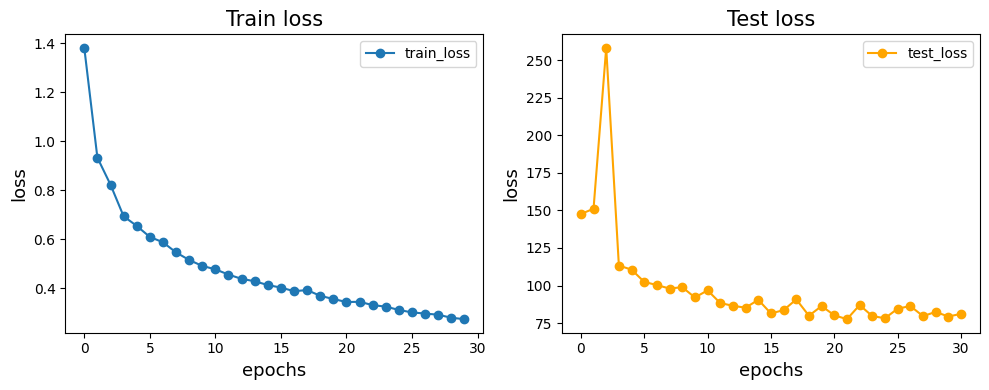

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# primo subplot
axs[0].set_title("Train loss", fontsize=15)
axs[0].plot(train_losses, '-o', label='train_loss')
axs[0].set_xlabel("epochs", fontsize=13)
axs[0].set_ylabel("loss", fontsize=13)
axs[0].legend()

# secondo subplot
axs[1].set_title("Test loss", fontsize=15)
axs[1].plot(test_losses, '-o', label='test_loss', color = 'orange')
axs[1].set_xlabel("epochs", fontsize=13)
axs[1].set_ylabel("loss", fontsize=13)
axs[1].legend()


plt.tight_layout()
plt.show()

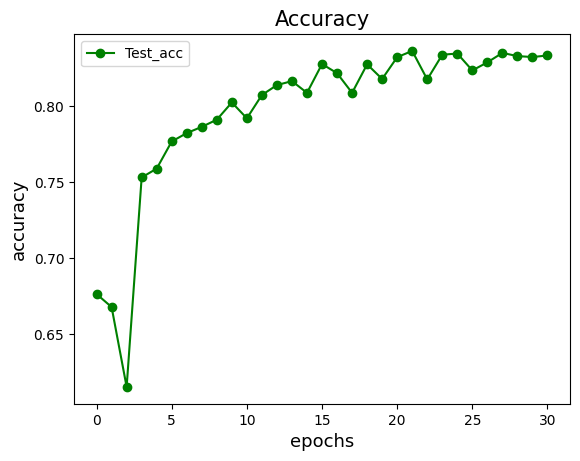

In [ ]:
plt.title("Accuracy", fontsize=15)
plt.plot(test_accuracies, "-o", label = 'Test_acc', color = 'green')
plt.xlabel("epochs", fontsize=13)
plt.ylabel("accuracy", fontsize=13)
plt.legend()

ResNet 68%

RESNET2

In [ ]:
train_losses = []
val_losses = []
val_accuracies = []
model_state_dict = None

for epoch in range(1, epochs + 1):
    train_loss = train(net, device, trainloader, optimizer, epoch)
    train_losses.append(train_loss)
    test_loss, test_acc = test(net, device, valloader)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

TypeError: ignored